In [6]:
import sys
sys.path.append('/home/jxm3/research/deidentification/unsupervised-deidentification')

In [1]:
import datasets

d = datasets.load_dataset('wiki_bio')

Using custom data configuration default
Reusing dataset wiki_bio (/home/jxm3/.cache/huggingface/datasets/wiki_bio/default/1.2.0/c05ce066e9026831cd7535968a311fc80f074b58868cfdffccbc811dff2ab6da)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
d

DatasetDict({
    train: Dataset({
        features: ['input_text', 'target_text'],
        num_rows: 582659
    })
    test: Dataset({
        features: ['input_text', 'target_text'],
        num_rows: 72831
    })
    val: Dataset({
        features: ['input_text', 'target_text'],
        num_rows: 72831
    })
})

In [3]:
t = d['train']

In [4]:
t[0]

{'input_text': {'table': {'column_header': ['name',
    'nationality',
    'birth_date',
    'article_title',
    'occupation'],
   'row_number': [1, 1, 1, 1, 1],
   'content': ['walter extra',
    'german',
    '1954',
    'walter extra\n',
    'aircraft designer and manufacturer']},
  'context': 'walter extra\n'},
 'target_text': 'walter extra is a german award-winning aerobatic pilot , chief aircraft designer and founder of extra flugzeugbau -lrb- extra aircraft construction -rrb- , a manufacturer of aerobatic aircraft .\nextra was trained as a mechanical engineer .\nhe began his flight training in gliders , transitioning to powered aircraft to perform aerobatics .\nhe built and flew a pitts special aircraft and later built his own extra ea-230 .\nextra began designing aircraft after competing in the 1982 world aerobatic championships .\nhis aircraft constructions revolutionized the aerobatics flying scene and still dominate world competitions .\nthe german pilot klaus schrodt won h

In [7]:
from utils import words_from_text
num_words_from_text = lambda t: len(words_from_text(t))

In [13]:
from tqdm.notebook import tqdm
num_words_from_ex = lambda ex: num_words_from_text(ex['target_text'])
t_num_words = list(map(num_words_from_ex, tqdm(t)))

  0%|          | 0/582659 [00:00<?, ?it/s]

  0%|          | 0/582659 [03:13<?, ?it/s]


In [15]:
num_rows_from_ex = lambda ex: sum(ex['input_text']['table']['row_number'])
t_num_rows = list(map(num_rows_from_ex, tqdm(t)))

  0%|          | 0/582659 [00:00<?, ?it/s]

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame.from_dict({'num_words': t_num_words, 'num_rows': t_num_rows})
df.head()

,num_words,num_rows
0,124,5
1,22,14
2,51,16
3,37,6
4,269,11


In [20]:
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'number of rows in profiles')

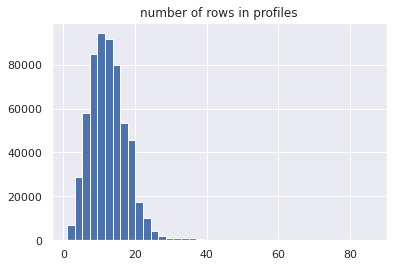

In [24]:
df['num_rows'].hist(bins=40).set_title('number of rows in profiles')

Text(0.5, 1.0, 'number of words in documents')

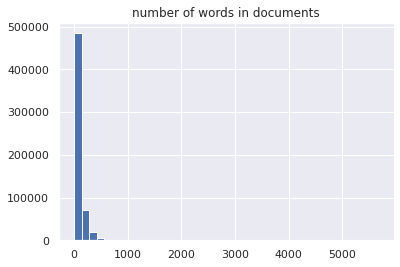

In [25]:
import matplotlib.pyplot as plt
df['num_words'].hist(bins=40).set_title('number of words in documents')

Text(0.5, 1.0, 'number of words in documents')

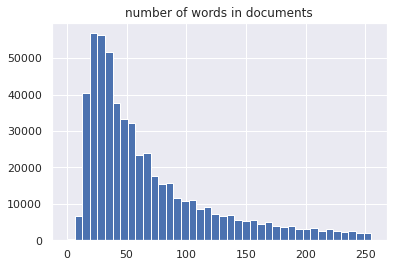

In [26]:
df['num_words'][df['num_words'] < 256].hist(bins=40).set_title('number of words in documents')

In [31]:
df['num_words'][df['num_words'] < 20].value_counts()

19    7432
18    6968
17    6391
16    5939
15    5417
14    4835
13    3413
12    2525
11    1414
10    1080
9      741
8      580
7      452
6      372
5       20
3        6
4        5
2        3
1        1
0        1
Name: num_words, dtype: int64

In [32]:
df['num_rows'][df['num_rows'] < 5].value_counts()

4    10990
3     5094
2     1394
1      258
Name: num_rows, dtype: int64